<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предварительный-анализ" data-toc-modified-id="Предварительный-анализ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предварительный анализ</a></span><ul class="toc-item"><li><span><a href="#Клиенты" data-toc-modified-id="Клиенты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Клиенты</a></span></li><li><span><a href="#Покупки" data-toc-modified-id="Покупки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Покупки</a></span></li></ul></li><li><span><a href="#Визализация" data-toc-modified-id="Визализация-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Визализация</a></span><ul class="toc-item"><li><span><a href="#Клиенты" data-toc-modified-id="Клиенты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Клиенты</a></span></li><li><span><a href="#Покупки" data-toc-modified-id="Покупки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Покупки</a></span></li></ul></li><li><span><a href="#Работа-с-датами" data-toc-modified-id="Работа-с-датами-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Работа с датами</a></span></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Объединение таблиц</a></span></li><li><span><a href="#Взаимосвязь" data-toc-modified-id="Взаимосвязь-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Взаимосвязь</a></span></li></ul></div>

*Просмотр данных, предоставленных по сетевым магазинам*

## Предварительный анализ

In [1]:
import pandas as pd
import seaborn as sb
import phik
from phik.report import plot_correlation_matrix
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime


### Клиенты

In [2]:
df1=pd.read_csv(r'C:...........csv', sep=',')
pd.set_option('display.max_columns', None) 

In [3]:
df1.head(3)

,Unnamed: 0,Дата добавления,Тип карты,Номер карты,Моб.телефон,Фамилия,Имя,Отчество,Пол,Дата рождения,По рекомендации,Всего бонусов,Активные бонусы,Неактивные бонусы,Получено бонусов,Использовано бонусов,Дата последней покупки,Покупок,Средний чек (руб),Сумма покупок (руб),Инстаграм,ВКонтакте,Одноклассники,Адрес,Создан кассиром,Создан в магазине,Магазин,Адрес.1,Согласие на СМС,Согласие на рекламу
0,0,2022-10-22,Стандартная,3c69db03e1f1ea1996a5ebf241467308,5c13f30c21d9cef89ec9408c049497a7,d4feeb50ad08ceae4cc7beec4c6c012f,edaf1cec71662fd6650a5b1f4b6760bb,8d7e55567659b7cf21801e0728821eb0,NaN,2022-04-18 00:00:00,NaN,500.0,500.0,0,500,0.0,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,Интернет,Интернет,Интернет,NaN,Да,Да
1,1,2022-10-22,Стандартная,21ab2f983ac7ef581f6c0cd4a9f058a7,babb008e0127d702f62789baf388dbd6,5d18b53491853def86933c7ae83ebf4f,c5a8a46a9f8e0c638ca2d4768ba89931,83dd9ffa0ef298a5cb4089b5e98941b7,М,1986-09-16 00:00:00,NaN,541.0,500.0,41,541,0.0,2022-10-22,1,3370.0,3370.0,NaN,NaN,NaN,NaN,Касса1,1,1,1.0,Да,Да
2,2,2022-10-22,Стандартная,7f768393a171d695439368439a812234,f8b8aec2bee7469bbc46943fb484c303,6fc32bd5fd3c102ccbdc03050c19c35b,3fb505ad1f928db15ce48d79d4e60c93,60b7f57fd0bac18fe028812e25b86893,М,1995-03-01 00:00:00,NaN,71.0,0.0,71,71,0.0,2022-10-22,1,2886.0,2886.0,NaN,NaN,NaN,NaN,Касса1,1,1,1.0,Да,Да


In [4]:
def evaluation(data): #Функция для вывода общей информации о таблице: статистика, пропуски, дубликаты и т.д.
    information=(display('ИНФОРМАЦИЯ О ДАННЫХ',data.head(3)), display(data.info()), display('СТАТИСТИКА',data.describe()), display(data.describe(include=['object', 'bool'])), display('ЗАВИСИМОСТЬ ПРИЗНАКОВ',data.corr()), display('ПРОЦЕНТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ',data.isna().mean()*100), display('ДУБЛИКАТЫ',data.duplicated().sum()))
    return information

evaluation(df1)

'ИНФОРМАЦИЯ О ДАННЫХ'

,Unnamed: 0,Дата добавления,Тип карты,Номер карты,Моб.телефон,Фамилия,Имя,Отчество,Пол,Дата рождения,По рекомендации,Всего бонусов,Активные бонусы,Неактивные бонусы,Получено бонусов,Использовано бонусов,Дата последней покупки,Покупок,Средний чек (руб),Сумма покупок (руб),Инстаграм,ВКонтакте,Одноклассники,Адрес,Создан кассиром,Создан в магазине,Магазин,Адрес.1,Согласие на СМС,Согласие на рекламу
0,0,2022-10-22,Стандартная,3c69db03e1f1ea1996a5ebf241467308,5c13f30c21d9cef89ec9408c049497a7,d4feeb50ad08ceae4cc7beec4c6c012f,edaf1cec71662fd6650a5b1f4b6760bb,8d7e55567659b7cf21801e0728821eb0,NaN,2022-04-18 00:00:00,NaN,500.0,500.0,0,500,0.0,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,Интернет,Интернет,Интернет,NaN,Да,Да
1,1,2022-10-22,Стандартная,21ab2f983ac7ef581f6c0cd4a9f058a7,babb008e0127d702f62789baf388dbd6,5d18b53491853def86933c7ae83ebf4f,c5a8a46a9f8e0c638ca2d4768ba89931,83dd9ffa0ef298a5cb4089b5e98941b7,М,1986-09-16 00:00:00,NaN,541.0,500.0,41,541,0.0,2022-10-22,1,3370.0,3370.0,NaN,NaN,NaN,NaN,Касса1,1,1,1.0,Да,Да
2,2,2022-10-22,Стандартная,7f768393a171d695439368439a812234,f8b8aec2bee7469bbc46943fb484c303,6fc32bd5fd3c102ccbdc03050c19c35b,3fb505ad1f928db15ce48d79d4e60c93,60b7f57fd0bac18fe028812e25b86893,М,1995-03-01 00:00:00,NaN,71.0,0.0,71,71,0.0,2022-10-22,1,2886.0,2886.0,NaN,NaN,NaN,NaN,Касса1,1,1,1.0,Да,Да


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21004 entries, 0 to 21003
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              21004 non-null  int64  
 1   Дата добавления         21004 non-null  object 
 2   Тип карты               21004 non-null  object 
 3   Номер карты             21004 non-null  object 
 4   Моб.телефон             21004 non-null  object 
 5   Фамилия                 21004 non-null  object 
 6   Имя                     21004 non-null  object 
 7   Отчество                21004 non-null  object 
 8   Пол                     20039 non-null  object 
 9   Дата рождения           20836 non-null  object 
 10  По рекомендации         0 non-null      float64
 11  Всего бонусов           21004 non-null  float64
 12  Активные бонусы         21004 non-null  float64
 13  Неактивные бонусы       21004 non-null  int64  
 14  Получено бонусов        21004 non-null

None

'СТАТИСТИКА'

,Unnamed: 0,По рекомендации,Всего бонусов,Активные бонусы,Неактивные бонусы,Получено бонусов,Использовано бонусов,Покупок,Средний чек (руб),Сумма покупок (руб),Инстаграм,ВКонтакте,Одноклассники,Адрес,Адрес.1
count,21004.000000,0.0,21004.000000,21004.000000,21004.000000,21004.000000,21004.000000,21004.000000,21004.000000,21004.000000,0.0,0.0,0.0,0.0,20878.000000
mean,10501.500000,NaN,192.841795,191.540329,1.301466,1884.763902,169.199071,2.781423,2757.764035,6861.093246,NaN,NaN,NaN,NaN,1.412923
std,6063.476863,NaN,260.957201,260.311967,13.638578,1242.608159,372.620529,3.580111,3850.296623,11291.422705,NaN,NaN,NaN,NaN,0.492371
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000
25%,5250.750000,NaN,20.000000,19.000000,0.000000,1016.000000,0.000000,1.000000,755.000000,1260.000000,NaN,NaN,NaN,NaN,1.000000
50%,10501.500000,NaN,76.000000,75.000000,0.000000,1635.000000,0.000000,2.000000,1645.000000,3446.000000,NaN,NaN,NaN,NaN,1.000000
75%,15752.250000,NaN,270.000000,269.000000,0.000000,2647.000000,143.000000,3.000000,3264.000000,8235.000000,NaN,NaN,NaN,NaN,2.000000
max,21003.000000,NaN,4925.000000,4925.000000,806.000000,13462.000000,8861.000000,122.000000,131797.000000,549266.750000,NaN,NaN,NaN,NaN,2.000000


,Дата добавления,Тип карты,Номер карты,Моб.телефон,Фамилия,Имя,Отчество,Пол,Дата рождения,Дата последней покупки,Создан кассиром,Создан в магазине,Магазин,Согласие на СМС,Согласие на рекламу
count,21004,21004,21004,21004,21004,21004,21004,20039,20836,20716,21004,17507,21003,21004,21004
unique,925,1,21004,21004,10615,878,1095,2,9786,908,5,3,3,2,3
top,2020-12-27,Стандартная,3c69db03e1f1ea1996a5ebf241467308,5c13f30c21d9cef89ec9408c049497a7,355fd4c705dabff0c41308840146cf5f,c2747290f166dcb3c95513a82edce885,42859ab4a6e98163dd8022de02fdd9c1,Ж,1986-07-20 00:00:00,2022-01-16,Касса1,1,1,Да,Да
freq,149,21004,1,1,211,940,1599,11189,12,169,10735,11975,12257,19780,19771


'ЗАВИСИМОСТЬ ПРИЗНАКОВ'

,Unnamed: 0,По рекомендации,Всего бонусов,Активные бонусы,Неактивные бонусы,Получено бонусов,Использовано бонусов,Покупок,Средний чек (руб),Сумма покупок (руб),Инстаграм,ВКонтакте,Одноклассники,Адрес,Адрес.1
Unnamed: 0,1.000000,NaN,0.045283,0.047346,-0.037236,0.693560,0.288049,0.284705,-0.065041,0.145368,NaN,NaN,NaN,NaN,0.091896
По рекомендации,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Всего бонусов,0.045283,NaN,1.000000,0.998634,0.073383,0.321391,0.184519,0.154630,0.372896,0.422706,NaN,NaN,NaN,NaN,-0.033760
Активные бонусы,0.047346,NaN,0.998634,1.000000,0.021171,0.320397,0.177627,0.147292,0.372853,0.413846,NaN,NaN,NaN,NaN,-0.032539
Неактивные бонусы,-0.037236,NaN,0.073383,0.021171,1.000000,0.034182,0.140283,0.147364,0.018465,0.189091,NaN,NaN,NaN,NaN,-0.024853
Получено бонусов,0.693560,NaN,0.321391,0.320397,0.034182,1.000000,0.507589,0.382877,0.083300,0.383719,NaN,NaN,NaN,NaN,0.068723
Использовано бонусов,0.288049,NaN,0.184519,0.177627,0.140283,0.507589,1.000000,0.663325,0.047711,0.643065,NaN,NaN,NaN,NaN,-0.028189
Покупок,0.284705,NaN,0.154630,0.147292,0.147364,0.382877,0.663325,1.000000,-0.058722,0.568959,NaN,NaN,NaN,NaN,-0.037849
Средний чек (руб),-0.065041,NaN,0.372896,0.372853,0.018465,0.083300,0.047711,-0.058722,1.000000,0.501844,NaN,NaN,NaN,NaN,-0.015104
Сумма покупок (руб),0.145368,NaN,0.422706,0.413846,0.189091,0.383719,0.643065,0.568959,0.501844,1.000000,NaN,NaN,NaN,NaN,-0.046984


'ПРОЦЕНТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ'

Unnamed: 0                  0.000000
Дата добавления             0.000000
Тип карты                   0.000000
Номер карты                 0.000000
Моб.телефон                 0.000000
Фамилия                     0.000000
Имя                         0.000000
Отчество                    0.000000
Пол                         4.594363
Дата рождения               0.799848
По рекомендации           100.000000
Всего бонусов               0.000000
Активные бонусы             0.000000
Неактивные бонусы           0.000000
Получено бонусов            0.000000
Использовано бонусов        0.000000
Дата последней покупки      1.371167
Покупок                     0.000000
Средний чек (руб)           0.000000
Сумма покупок (руб)         0.000000
Инстаграм                 100.000000
ВКонтакте                 100.000000
Одноклассники             100.000000
Адрес                     100.000000
Создан кассиром             0.000000
Создан в магазине          16.649210
Магазин                     0.004761
А

'ДУБЛИКАТЫ'

0

(None, None, None, None, None, None, None)

### Покупки

In [5]:
df2=pd.read_csv(r'...........csv', sep=',')
pd.set_option('display.max_columns', None) 

In [6]:
df2.head(3)

,Unnamed: 0,Дата операции,Тип операции,Моб.телефон,Списано бонусов,Начислено бонусов,№ чека,Сумма покупки,Сумма скидки,Оплата в рублях,Оплата бонусами,Тип карты,Номер карты,Кассир,Магазин,Комментарий,Товар,Количество,Категория товара,Дополнительная информация
0,0,2022-10-23,Покупка,e41ae15e64ed6f2d2b37caf2023903b0,0.0,0.0,60560.0,6.0,0.0,6.0,0.0,Стандартная,c1a0b6a21175d40691f046a448ed33a7,Касса1,1.0,NaN,NaN,1.0,NaN,NaN
1,1,2022-10-23,Покупка,e41ae15e64ed6f2d2b37caf2023903b0,499.0,45.0,60560.0,4999.0,0.0,4500.0,499.0,Стандартная,c1a0b6a21175d40691f046a448ed33a7,Касса1,1.0,NaN,NaN,1.0,Начисление 1 списание 10,"Начисление бонусов: 45 (Основные настройки, ка..."
2,2,2022-10-23,Покупка,3281acace8e8d42572c5a0e3ab67a938,406.1,108.0,60559.0,3999.0,0.0,3592.9,406.1,Стандартная,f2f76029fc6490531b997348bce55922,Касса3,2.0,NaN,NaN,1.0,Начисление 3 списание 20,"Начисление бонусов: 108 (Основные настройки, к..."


In [7]:
evaluation(df2)

'ИНФОРМАЦИЯ О ДАННЫХ'

,Unnamed: 0,Дата операции,Тип операции,Моб.телефон,Списано бонусов,Начислено бонусов,№ чека,Сумма покупки,Сумма скидки,Оплата в рублях,Оплата бонусами,Тип карты,Номер карты,Кассир,Магазин,Комментарий,Товар,Количество,Категория товара,Дополнительная информация
0,0,2022-10-23,Покупка,e41ae15e64ed6f2d2b37caf2023903b0,0.0,0.0,60560.0,6.0,0.0,6.0,0.0,Стандартная,c1a0b6a21175d40691f046a448ed33a7,Касса1,1.0,NaN,NaN,1.0,NaN,NaN
1,1,2022-10-23,Покупка,e41ae15e64ed6f2d2b37caf2023903b0,499.0,45.0,60560.0,4999.0,0.0,4500.0,499.0,Стандартная,c1a0b6a21175d40691f046a448ed33a7,Касса1,1.0,NaN,NaN,1.0,Начисление 1 списание 10,"Начисление бонусов: 45 (Основные настройки, ка..."
2,2,2022-10-23,Покупка,3281acace8e8d42572c5a0e3ab67a938,406.1,108.0,60559.0,3999.0,0.0,3592.9,406.1,Стандартная,f2f76029fc6490531b997348bce55922,Касса3,2.0,NaN,NaN,1.0,Начисление 3 списание 20,"Начисление бонусов: 108 (Основные настройки, к..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260922 entries, 0 to 260921
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 260922 non-null  int64  
 1   Дата операции              260922 non-null  object 
 2   Тип операции               260922 non-null  object 
 3   Моб.телефон                260922 non-null  object 
 4   Списано бонусов            260205 non-null  float64
 5   Начислено бонусов          259639 non-null  float64
 6   № чека                     111247 non-null  float64
 7   Сумма покупки              111247 non-null  float64
 8   Сумма скидки               111247 non-null  float64
 9   Оплата в рублях            111247 non-null  float64
 10  Оплата бонусами            260922 non-null  float64
 11  Тип карты                  109827 non-null  object 
 12  Номер карты                260922 non-null  object 
 13  Кассир                     11

None

'СТАТИСТИКА'

,Unnamed: 0,Списано бонусов,Начислено бонусов,№ чека,Сумма покупки,Сумма скидки,Оплата в рублях,Оплата бонусами,Магазин,Товар,Количество
count,260922.000000,260205.000000,259639.000000,111247.000000,111247.000000,111247.000000,111247.000000,260922.000000,100004.000000,0.0,111247.0
mean,130460.500000,136.682393,152.458923,29700.972889,1351.815442,24.415468,1295.449842,13.621102,1.333577,NaN,1.0
std,75321.837806,214.442089,220.828703,17248.971301,3278.701726,194.988409,3187.996253,66.167461,0.471493,NaN,0.0
min,0.000000,0.000000,0.000000,1.000000,-54312.000000,-5598.000000,-54312.000000,-1048.000000,1.000000,NaN,1.0
25%,65230.250000,0.000000,0.000000,14422.000000,155.000000,0.000000,150.000000,0.000000,1.000000,NaN,1.0
50%,130460.500000,0.000000,12.000000,29953.000000,475.000000,0.000000,438.010000,0.000000,1.000000,NaN,1.0
75%,195690.750000,348.760000,500.000000,43775.000000,1300.000000,0.000000,1255.000000,0.000000,2.000000,NaN,1.0
max,260921.000000,2599.100000,3945.000000,60560.000000,131500.000000,11500.000000,131500.000000,2599.100000,2.000000,NaN,1.0


,Дата операции,Тип операции,Моб.телефон,Тип карты,Номер карты,Кассир,Комментарий,Категория товара,Дополнительная информация
count,260922,260922,260922,109827,260922,111210,1420,106171,49627
unique,934,7,20903,1,20903,3,1,4,21661
top,2022-01-16,Покупка,840e9c1385d8ba15cf74c89b11537405,Стандартная,fa21f6201f1158f5c36fedcb97fd9d28,Касса1,Возврат,Начисление 3 списание 20,Начисление бонусов: 3 (Основные настройки);
freq,1122,109827,451,109827,451,61081,1420,68559,746


'ЗАВИСИМОСТЬ ПРИЗНАКОВ'

,Unnamed: 0,Списано бонусов,Начислено бонусов,№ чека,Сумма покупки,Сумма скидки,Оплата в рублях,Оплата бонусами,Магазин,Товар,Количество
Unnamed: 0,1.000000,-0.178533,-0.131233,-0.996928,-0.028758,-0.065770,-0.023918,0.018847,-0.095432,NaN,NaN
Списано бонусов,-0.178533,1.000000,-0.417676,0.060182,0.207120,0.039895,0.179968,0.184943,0.008755,NaN,NaN
Начислено бонусов,-0.131233,-0.417676,1.000000,0.031082,0.874271,0.332001,0.873669,-0.068578,-0.015399,NaN,NaN
№ чека,-0.996928,0.060182,0.031082,1.000000,0.028401,0.064250,0.023560,0.055696,0.106459,NaN,NaN
Сумма покупки,-0.028758,0.207120,0.874271,0.028401,1.000000,0.384897,0.998030,0.222933,-0.023664,NaN,NaN
Сумма скидки,-0.065770,0.039895,0.332001,0.064250,0.384897,1.000000,0.333305,0.044713,-0.003270,NaN,NaN
Оплата в рублях,-0.023918,0.179968,0.873669,0.023560,0.998030,0.333305,1.000000,0.195675,-0.024370,NaN,NaN
Оплата бонусами,0.018847,0.184943,-0.068578,0.055696,0.222933,0.044713,0.195675,1.000000,0.008014,NaN,NaN
Магазин,-0.095432,0.008755,-0.015399,0.106459,-0.023664,-0.003270,-0.024370,0.008014,1.000000,NaN,NaN
Товар,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'ПРОЦЕНТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ'

Unnamed: 0                     0.000000
Дата операции                  0.000000
Тип операции                   0.000000
Моб.телефон                    0.000000
Списано бонусов                0.274795
Начислено бонусов              0.491718
№ чека                        57.363887
Сумма покупки                 57.363887
Сумма скидки                  57.363887
Оплата в рублях               57.363887
Оплата бонусами                0.000000
Тип карты                     57.908110
Номер карты                    0.000000
Кассир                        57.378067
Магазин                       61.672837
Комментарий                   99.455776
Товар                        100.000000
Количество                    57.363887
Категория товара              59.309295
Дополнительная информация     80.980140
dtype: float64

'ДУБЛИКАТЫ'

0

(None, None, None, None, None, None, None)

## Визализация

### Клиенты

<AxesSubplot:xlabel='Всего бонусов'>

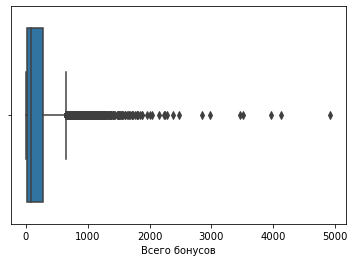

In [8]:
sb.boxplot(df1[df1.columns[11]])

<AxesSubplot:xlabel='Активные бонусы'>

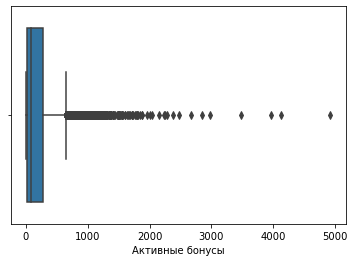

In [9]:
sb.boxplot(df1[df1.columns[12]])

<AxesSubplot:xlabel='Неактивные бонусы'>

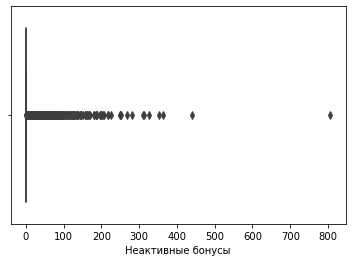

In [10]:
sb.boxplot(df1[df1.columns[13]])

<AxesSubplot:xlabel='Получено бонусов'>

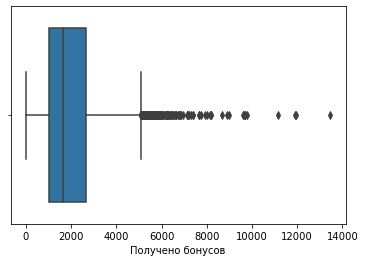

In [11]:
sb.boxplot(df1[df1.columns[14]])


<AxesSubplot:xlabel='Использовано бонусов'>

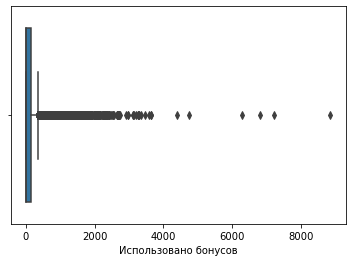

In [12]:
sb.boxplot(df1[df1.columns[15]])

<AxesSubplot:xlabel='Покупок'>

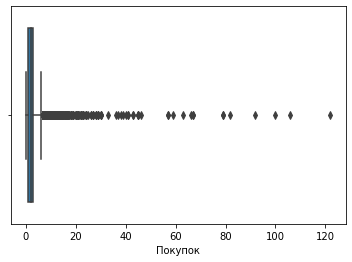

In [13]:
sb.boxplot(df1[df1.columns[17]])


<AxesSubplot:xlabel='Средний чек (руб)'>

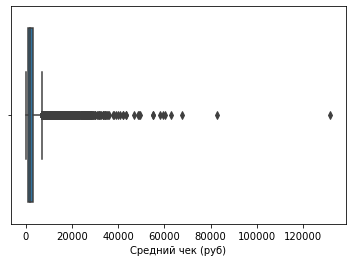

In [14]:
sb.boxplot(df1[df1.columns[18]])


<AxesSubplot:xlabel='Сумма покупок (руб)'>

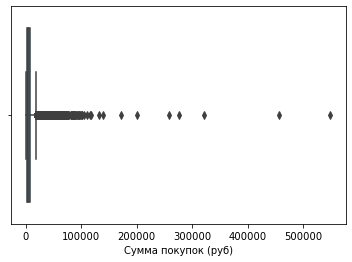

In [15]:
sb.boxplot(df1[df1.columns[19]])


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21004 entries, 0 to 21003
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              21004 non-null  int64  
 1   Дата добавления         21004 non-null  object 
 2   Тип карты               21004 non-null  object 
 3   Номер карты             21004 non-null  object 
 4   Моб.телефон             21004 non-null  object 
 5   Фамилия                 21004 non-null  object 
 6   Имя                     21004 non-null  object 
 7   Отчество                21004 non-null  object 
 8   Пол                     20039 non-null  object 
 9   Дата рождения           20836 non-null  object 
 10  По рекомендации         0 non-null      float64
 11  Всего бонусов           21004 non-null  float64
 12  Активные бонусы         21004 non-null  float64
 13  Неактивные бонусы       21004 non-null  int64  
 14  Получено бонусов        21004 non-null

array([[<AxesSubplot:title={'center':'Всего бонусов'}>,
        <AxesSubplot:title={'center':'Активные бонусы'}>,
        <AxesSubplot:title={'center':'Неактивные бонусы'}>],
       [<AxesSubplot:title={'center':'Получено бонусов'}>,
        <AxesSubplot:title={'center':'Использовано бонусов'}>,
        <AxesSubplot:title={'center':'Покупок'}>],
       [<AxesSubplot:title={'center':'Средний чек (руб)'}>,
        <AxesSubplot:title={'center':'Сумма покупок (руб)'}>,
        <AxesSubplot:title={'center':'Адрес.1'}>]], dtype=object)

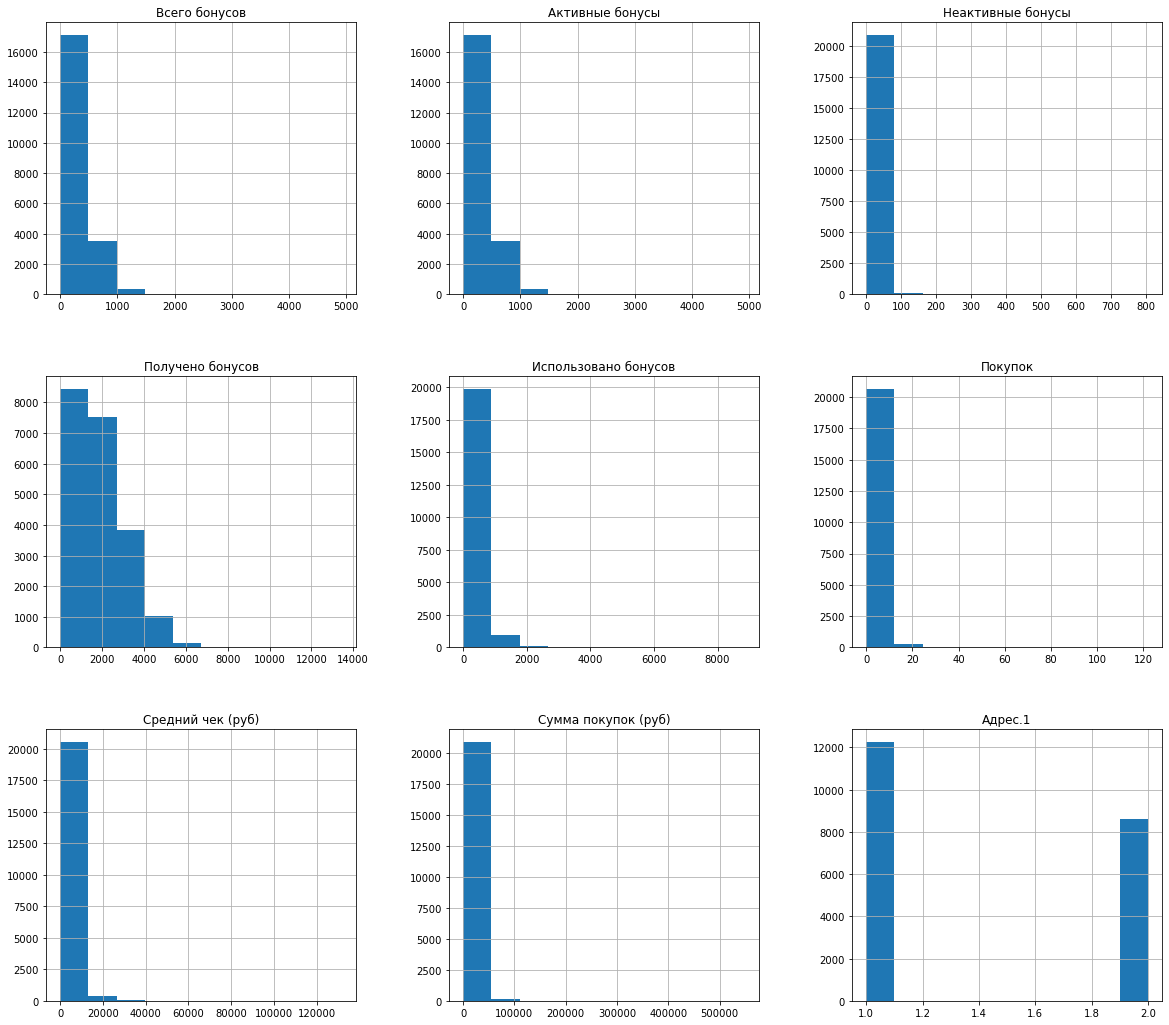

In [17]:
(df1[['Всего бонусов', 'Активные бонусы', 'Неактивные бонусы','Получено бонусов',
      'Использовано бонусов', 'Покупок', 'Средний чек (руб)','Сумма покупок (руб)','Адрес.1']]).hist(figsize=(20, 18))

### Покупки


<AxesSubplot:xlabel='Списано бонусов'>

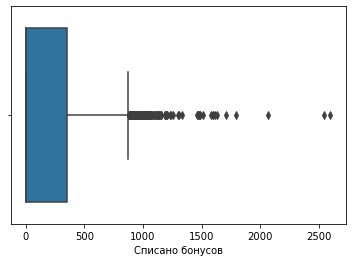

In [18]:
sb.boxplot(df2[df2.columns[4]])

<AxesSubplot:xlabel='Начислено бонусов'>

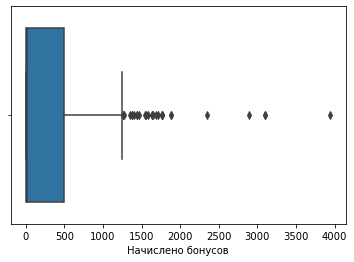

In [19]:
sb.boxplot(df2[df2.columns[5]])

<AxesSubplot:xlabel='Сумма покупки'>

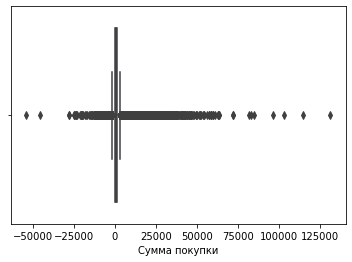

In [20]:
sb.boxplot(df2[df2.columns[7]])

<AxesSubplot:xlabel='Сумма скидки'>

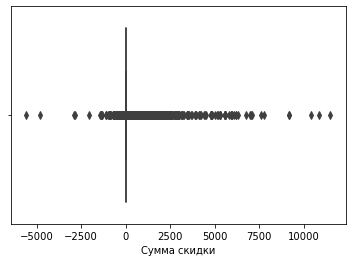

In [21]:
sb.boxplot(df2[df2.columns[8]])

<AxesSubplot:xlabel='Оплата в рублях'>

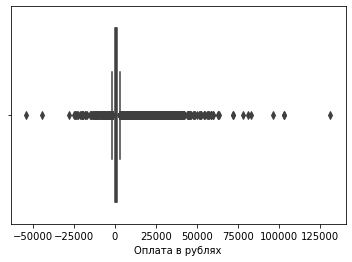

In [22]:
sb.boxplot(df2[df2.columns[9]])

<AxesSubplot:xlabel='Оплата бонусами'>

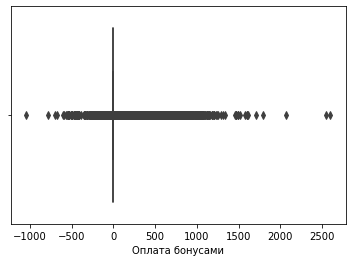

In [23]:
sb.boxplot(df2[df2.columns[10]])

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260922 entries, 0 to 260921
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 260922 non-null  int64  
 1   Дата операции              260922 non-null  object 
 2   Тип операции               260922 non-null  object 
 3   Моб.телефон                260922 non-null  object 
 4   Списано бонусов            260205 non-null  float64
 5   Начислено бонусов          259639 non-null  float64
 6   № чека                     111247 non-null  float64
 7   Сумма покупки              111247 non-null  float64
 8   Сумма скидки               111247 non-null  float64
 9   Оплата в рублях            111247 non-null  float64
 10  Оплата бонусами            260922 non-null  float64
 11  Тип карты                  109827 non-null  object 
 12  Номер карты                260922 non-null  object 
 13  Кассир                     11

array([[<AxesSubplot:title={'center':'Списано бонусов'}>,
        <AxesSubplot:title={'center':'Начислено бонусов'}>],
       [<AxesSubplot:title={'center':'Сумма покупки'}>,
        <AxesSubplot:title={'center':'Сумма скидки'}>],
       [<AxesSubplot:title={'center':'Оплата в рублях'}>,
        <AxesSubplot:title={'center':'Оплата бонусами'}>]], dtype=object)

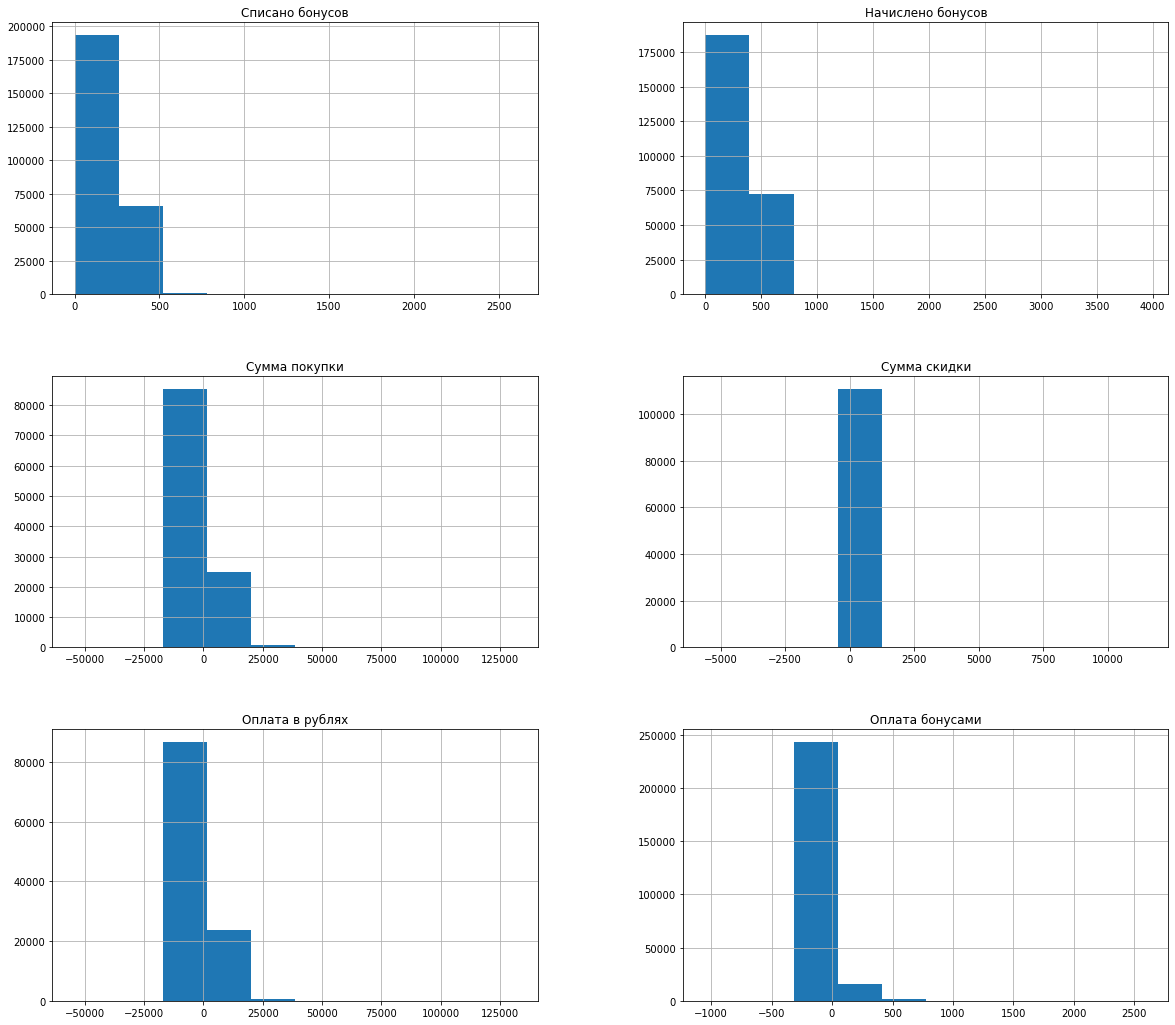

In [25]:
(df2[['Списано бонусов', 'Начислено бонусов', 'Сумма покупки','Сумма скидки',
      'Оплата в рублях', 'Оплата бонусами']]).hist(figsize=(20, 18))

## Работа с датами

In [26]:
df2['Дата операции'] = pd.to_datetime(df2['Дата операции'], format='%Y-%m-%d')
df1['Дата добавления'] = pd.to_datetime(df1['Дата добавления'], format='%Y-%m-%d')

df1['Дата последней покупки'] = pd.to_datetime(df1['Дата последней покупки'], format='%Y-%m-%d')

In [27]:
df1['Дата рождения'] = pd.to_datetime(df1['Дата рождения'],infer_datetime_format=False, errors = 'coerce')

In [28]:
df1['yaer_born']= df1['Дата рождения'].dt.year

<AxesSubplot:xlabel='yaer_born'>

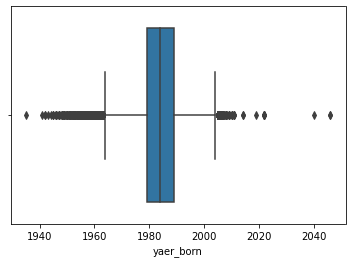

In [29]:
sb.boxplot(df1['yaer_born'])

In [30]:
#Удалю года больше 2022
df1=df1.query('yaer_born<=2022')

<AxesSubplot:xlabel='yaer_born'>

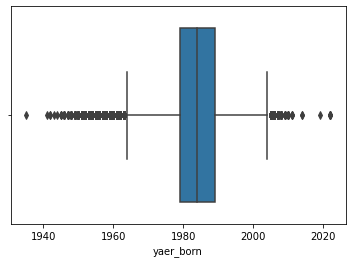

In [31]:
sb.boxplot(df1['yaer_born'])

<AxesSubplot:xlabel='year_purchases'>

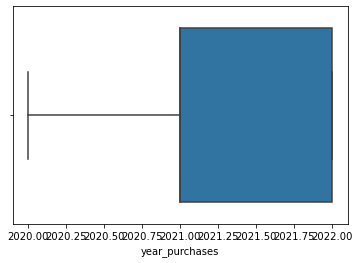

In [32]:
df2['year_purchases']= df2['Дата операции'].dt.year
sb.boxplot(df2['year_purchases'])

<AxesSubplot:xlabel='year_add'>

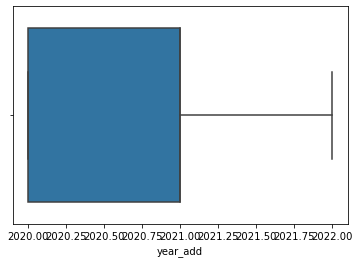

In [33]:
df1['year_add']= df1['Дата добавления'].dt.year
sb.boxplot(df1['year_add'])

<AxesSubplot:xlabel='year_last_purchases'>

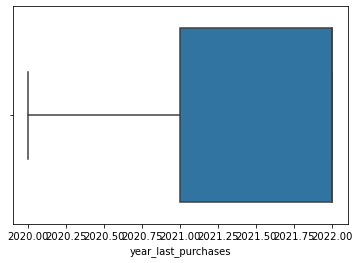

In [34]:
df1['year_last_purchases']= df1['Дата последней покупки'].dt.year
df1['month_last_purchase']= df1['Дата последней покупки'].dt.month
sb.boxplot(df1['year_last_purchases'])

<AxesSubplot:xlabel='month_last_purchase'>

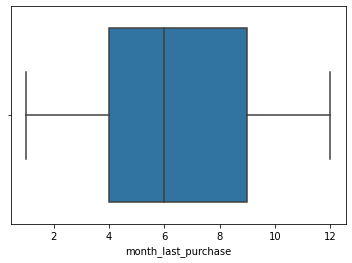

In [35]:
sb.boxplot(df1['month_last_purchase'])

In [36]:
# добавлю колонку с возрастом клиента
df1['age']=2022-df1['yaer_born']
df1.head(10)

,Unnamed: 0,Дата добавления,Тип карты,Номер карты,Моб.телефон,Фамилия,Имя,Отчество,Пол,Дата рождения,По рекомендации,Всего бонусов,Активные бонусы,Неактивные бонусы,Получено бонусов,Использовано бонусов,Дата последней покупки,Покупок,Средний чек (руб),Сумма покупок (руб),Инстаграм,ВКонтакте,Одноклассники,Адрес,Создан кассиром,Создан в магазине,Магазин,Адрес.1,Согласие на СМС,Согласие на рекламу,yaer_born,year_add,year_last_purchases,month_last_purchase,age
0,0,2022-10-22,Стандартная,3c69db03e1f1ea1996a5ebf241467308,5c13f30c21d9cef89ec9408c049497a7,d4feeb50ad08ceae4cc7beec4c6c012f,edaf1cec71662fd6650a5b1f4b6760bb,8d7e55567659b7cf21801e0728821eb0,NaN,2022-04-18,NaN,500.0,500.0,0,500,0.0,NaT,0,0.0,0.0,NaN,NaN,NaN,NaN,Интернет,Интернет,Интернет,NaN,Да,Да,2022.0,2022,NaN,NaN,0.0
1,1,2022-10-22,Стандартная,21ab2f983ac7ef581f6c0cd4a9f058a7,babb008e0127d702f62789baf388dbd6,5d18b53491853def86933c7ae83ebf4f,c5a8a46a9f8e0c638ca2d4768ba89931,83dd9ffa0ef298a5cb4089b5e98941b7,М,1986-09-16,NaN,541.0,500.0,41,541,0.0,2022-10-22,1,3370.0,3370.0,NaN,NaN,NaN,NaN,Касса1,1,1,1.0,Да,Да,1986.0,2022,2022.0,10.0,36.0
2,2,2022-10-22,Стандартная,7f768393a171d695439368439a812234,f8b8aec2bee7469bbc46943fb484c303,6fc32bd5fd3c102ccbdc03050c19c35b,3fb505ad1f928db15ce48d79d4e60c93,60b7f57fd0bac18fe028812e25b86893,М,1995-03-01,NaN,71.0,0.0,71,71,0.0,2022-10-22,1,2886.0,2886.0,NaN,NaN,NaN,NaN,Касса1,1,1,1.0,Да,Да,1995.0,2022,2022.0,10.0,27.0
3,3,2022-10-22,Стандартная,0ec4ddbd5aaa6a49722a5cf3003f3d39,8da4709238ea00c4bf84418353041eb2,c20b6190715e8669c5f3714ee8a9e6ee,74a7882f53b31aaf97e537e387ac7f88,5b2d820de7762aaeb05e84aa6f56e8c0,Ж,1980-06-12,NaN,56.0,0.0,56,56,0.0,2022-10-22,2,899.0,1798.0,NaN,NaN,NaN,NaN,Касса3,2,2,2.0,Да,Да,1980.0,2022,2022.0,10.0,42.0
5,5,2022-10-22,Стандартная,c6e63e49ef854799c0e7ade9ed056ce3,f832221776781b7db05c65d3f6610d5f,0c678530124b1c280a924d505d7ab763,5702c9bb8524b484a71c6fec28a81640,6b6c616fcc312fe4e3bc14cd312111a5,NaN,1998-04-06,NaN,27.0,0.0,27,27,0.0,2022-10-22,1,899.0,899.0,NaN,NaN,NaN,NaN,Касса1,1,1,1.0,Да,Да,1998.0,2022,2022.0,10.0,24.0
6,6,2022-10-22,Стандартная,05be34e83af23a15e9ef1323b9095d7d,a6ed0896839ab6359512509e058a662a,ca0f07ceae8921d28b1c4c5c6c7b7f3e,eed9186414b2346a8a2a61ea80c14a4b,1fbf17a625c1095fbc1b9991874e5042,М,1989-02-01,NaN,0.0,0.0,0,0,0.0,2022-10-22,1,269.0,269.0,NaN,NaN,NaN,NaN,Касса3,2,2,2.0,Да,Да,1989.0,2022,2022.0,10.0,33.0
7,7,2022-10-22,Стандартная,03e5432420794339422ed141cc81e3f4,0a94a838fd7e97bb8dc0ee5aedaabb83,84f0d62a41a1a64d2639e4681c3ef010,d91fe50ed543f3cc5d865309a525930d,48f377a4bf39301b21ffc5a407540fab,Ж,1972-06-13,NaN,14.0,0.0,14,14,0.0,2022-10-22,1,276.0,276.0,NaN,NaN,NaN,NaN,Касса1,1,1,1.0,Да,Да,1972.0,2022,2022.0,10.0,50.0
8,8,2022-10-22,Стандартная,5cadb54e1dce7d157d518a9b6de69b22,b39f25fad9db17ecb4f0d077b330e7f4,e5548e661de67e85593adf99445da71e,694330b42ca84154a6bd54d9c76229b9,64b9eee4de8f5820d623d9451a992c4a,Ж,1978-08-29,NaN,180.0,0.0,180,180,0.0,2022-10-22,1,5999.0,5999.0,NaN,NaN,NaN,NaN,Касса3,2,2,2.0,Да,Да,1978.0,2022,2022.0,10.0,44.0
9,9,2022-10-22,Стандартная,1750a097652d9128264800026724c6bc,bc6403445b6c6eb8cea0fc25aeef3db8,43cc3263b954638402ff1b7aabe55d84,a1b7f6a3f2f0076239892d19ef7cb19a,993aaee717f9223171b21826ca0a15a5,М,1980-12-01,NaN,127.0,0.0,127,127,0.0,2022-10-22,2,2104.0,4208.0,NaN,NaN,NaN,NaN,Касса1,1,1,1.0,Да,Да,1980.0,2022,2022.0,10.0,42.0
11,11,2022-10-22,Стандартная,8784b742330f31cb61f2c384a8a1f42e,bed85115c054381f0fe1f18056beefc3,f1309872503d2414c72166697731ff94,74a7882f53b31aaf97e537e387ac7f88,6c397ddc2b1c6f48c6ed1cb7902af577,Ж,1972-08-07,NaN,8.0,0.0,8,8,0.0,2022-10-22,1,269.0,269.0,NaN,NaN,NaN,NaN,Касса1,1,1,1.0,Да,Да,1972.0,2022,2022.0,10.0,50.0


<AxesSubplot:xlabel='age'>

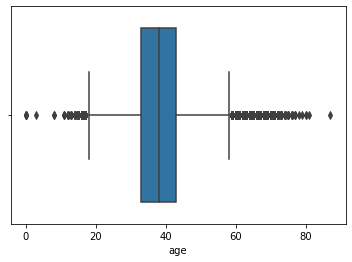

In [37]:
sb.boxplot(df1['age'])

<AxesSubplot:>

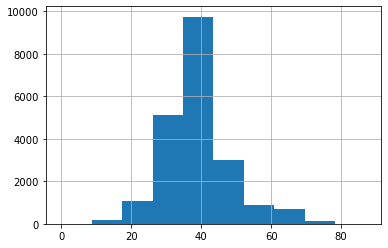

In [38]:
df1['age'].hist()

## Пропуски

**Пропуски. В первой таблице (clients) всё относительно просто. Рекомендую удалить колонки, в которых пропуски составляют 100%. Пропуски в категориальных данных заглушить, а в колоке Адрес1 (float) пропущенные значеия модно заполнить с помощью метода .interpolate(), который сохраняет распределение. В дальнейшем посмотреть нужен нам вообще этот признак или нет. 
Со второй таблицей сложно. Предполагаю, что нет смысла в признаках "товар", "комментарий", потому что там 100% и 99% пропсков, соответственно. Тоже самое можно сделать с дополнительной информацией. Остальные пропущенне значения можно попробовать. как и в первом случае заменить. сохранив распределение и заглуушить, а потом по метрике смотреть влияние на качество.**

In [39]:
df1=df1.drop(['По рекомендации','Инстаграм', 'ВКонтакте', 'Одноклассники', 'Адрес'], axis=1)
df1.columns

Index(['Unnamed: 0', 'Дата добавления', 'Тип карты', 'Номер карты',
       'Моб.телефон', 'Фамилия', 'Имя', 'Отчество', 'Пол', 'Дата рождения',
       'Всего бонусов', 'Активные бонусы', 'Неактивные бонусы',
       'Получено бонусов', 'Использовано бонусов', 'Дата последней покупки',
       'Покупок', 'Средний чек (руб)', 'Сумма покупок (руб)',
       'Создан кассиром', 'Создан в магазине', 'Магазин', 'Адрес.1',
       'Согласие на СМС', 'Согласие на рекламу', 'yaer_born', 'year_add',
       'year_last_purchases', 'month_last_purchase', 'age'],
      dtype='object')

In [40]:
df2=df2.drop(['Комментарий','Товар', 'Дополнительная информация'], axis=1)
df2.columns

Index(['Unnamed: 0', 'Дата операции', 'Тип операции', 'Моб.телефон',
       'Списано бонусов', 'Начислено бонусов', '№ чека', 'Сумма покупки',
       'Сумма скидки', 'Оплата в рублях', 'Оплата бонусами', 'Тип карты',
       'Номер карты', 'Кассир', 'Магазин', 'Количество', 'Категория товара',
       'year_purchases'],
      dtype='object')

In [41]:
# функция для удаления пропусков
def processing(data):
        
        miss=data.isna().sum().count()
        if miss>0:
            for col in data.columns:
                try:
                    data[col] = data[col].fillna(0)
                except:
                    data[col] = data[col].interpolate() #заполнение пропусков значенями,
            display('Пропуски удалены:', data.isna().sum())# сохраняющми ормальное распределение

In [42]:
# удаление пропущенных значений в данных Clients
processing(df1)

'Пропуски удалены:'

Unnamed: 0                0
Дата добавления           0
Тип карты                 0
Номер карты               0
Моб.телефон               0
Фамилия                   0
Имя                       0
Отчество                  0
Пол                       0
Дата рождения             0
Всего бонусов             0
Активные бонусы           0
Неактивные бонусы         0
Получено бонусов          0
Использовано бонусов      0
Дата последней покупки    0
Покупок                   0
Средний чек (руб)         0
Сумма покупок (руб)       0
Создан кассиром           0
Создан в магазине         0
Магазин                   0
Адрес.1                   0
Согласие на СМС           0
Согласие на рекламу       0
yaer_born                 0
year_add                  0
year_last_purchases       0
month_last_purchase       0
age                       0
dtype: int64

In [43]:
# удаление пропущенных значений в данных purchases
processing(df2)

'Пропуски удалены:'

Unnamed: 0           0
Дата операции        0
Тип операции         0
Моб.телефон          0
Списано бонусов      0
Начислено бонусов    0
№ чека               0
Сумма покупки        0
Сумма скидки         0
Оплата в рублях      0
Оплата бонусами      0
Тип карты            0
Номер карты          0
Кассир               0
Магазин              0
Количество           0
Категория товара     0
year_purchases       0
dtype: int64

## Объединение таблиц

In [44]:
#Объединеие таблиц по номеру мобильного телефона и номеру карту
df=pd.merge(df1, df2, on=['Моб.телефон','Номер карты'], how='outer' )
df.head()

,Unnamed: 0_x,Дата добавления,Тип карты_x,Номер карты,Моб.телефон,Фамилия,Имя,Отчество,Пол,Дата рождения,Всего бонусов,Активные бонусы,Неактивные бонусы,Получено бонусов,Использовано бонусов,Дата последней покупки,Покупок,Средний чек (руб),Сумма покупок (руб),Создан кассиром,Создан в магазине,Магазин_x,Адрес.1,Согласие на СМС,Согласие на рекламу,yaer_born,year_add,year_last_purchases,month_last_purchase,age,Unnamed: 0_y,Дата операции,Тип операции,Списано бонусов,Начислено бонусов,№ чека,Сумма покупки,Сумма скидки,Оплата в рублях,Оплата бонусами,Тип карты_y,Кассир,Магазин_y,Количество,Категория товара,year_purchases
0,0.0,2022-10-22,Стандартная,3c69db03e1f1ea1996a5ebf241467308,5c13f30c21d9cef89ec9408c049497a7,d4feeb50ad08ceae4cc7beec4c6c012f,edaf1cec71662fd6650a5b1f4b6760bb,8d7e55567659b7cf21801e0728821eb0,0,2022-04-18,500.0,500.0,0.0,500.0,0.0,0,0.0,0.0,0.0,Интернет,Интернет,Интернет,0.0,Да,Да,2022.0,2022.0,0.0,0.0,0.0,279.0,2022-10-22,Корректировка,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,2022.0
1,1.0,2022-10-22,Стандартная,21ab2f983ac7ef581f6c0cd4a9f058a7,babb008e0127d702f62789baf388dbd6,5d18b53491853def86933c7ae83ebf4f,c5a8a46a9f8e0c638ca2d4768ba89931,83dd9ffa0ef298a5cb4089b5e98941b7,М,1986-09-16,541.0,500.0,41.0,541.0,0.0,2022-10-22 00:00:00,1.0,3370.0,3370.0,Касса1,1,1,1.0,Да,Да,1986.0,2022.0,2022.0,10.0,36.0,284.0,2022-10-22,Корректировка,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,2022.0
2,1.0,2022-10-22,Стандартная,21ab2f983ac7ef581f6c0cd4a9f058a7,babb008e0127d702f62789baf388dbd6,5d18b53491853def86933c7ae83ebf4f,c5a8a46a9f8e0c638ca2d4768ba89931,83dd9ffa0ef298a5cb4089b5e98941b7,М,1986-09-16,541.0,500.0,41.0,541.0,0.0,2022-10-22 00:00:00,1.0,3370.0,3370.0,Касса1,1,1,1.0,Да,Да,1986.0,2022.0,2022.0,10.0,36.0,294.0,2022-10-22,Покупка,0.0,30.0,60549.0,2999.0,0.0,2999.0,0.0,Стандартная,Касса1,1.0,1.0,Начисление 1 списание 10,2022.0
3,1.0,2022-10-22,Стандартная,21ab2f983ac7ef581f6c0cd4a9f058a7,babb008e0127d702f62789baf388dbd6,5d18b53491853def86933c7ae83ebf4f,c5a8a46a9f8e0c638ca2d4768ba89931,83dd9ffa0ef298a5cb4089b5e98941b7,М,1986-09-16,541.0,500.0,41.0,541.0,0.0,2022-10-22 00:00:00,1.0,3370.0,3370.0,Касса1,1,1,1.0,Да,Да,1986.0,2022.0,2022.0,10.0,36.0,295.0,2022-10-22,Покупка,0.0,11.0,60549.0,371.0,0.0,371.0,0.0,Стандартная,Касса1,1.0,1.0,Начисление 3 списание 20,2022.0
4,2.0,2022-10-22,Стандартная,7f768393a171d695439368439a812234,f8b8aec2bee7469bbc46943fb484c303,6fc32bd5fd3c102ccbdc03050c19c35b,3fb505ad1f928db15ce48d79d4e60c93,60b7f57fd0bac18fe028812e25b86893,М,1995-03-01,71.0,0.0,71.0,71.0,0.0,2022-10-22 00:00:00,1.0,2886.0,2886.0,Касса1,1,1,1.0,Да,Да,1995.0,2022.0,2022.0,10.0,27.0,296.0,2022-10-22,Покупка,0.0,0.0,60548.0,499.0,0.0,499.0,0.0,Стандартная,Касса1,1.0,1.0,Начисление 0 списание 0,2022.0


In [45]:
#Получившиеся пропуски заполню 0, так как они возникли при объединении таблиц
df=df.fillna(0)
df.isna().mean()

Unnamed: 0_x              0.0
Дата добавления           0.0
Тип карты_x               0.0
Номер карты               0.0
Моб.телефон               0.0
Фамилия                   0.0
Имя                       0.0
Отчество                  0.0
Пол                       0.0
Дата рождения             0.0
Всего бонусов             0.0
Активные бонусы           0.0
Неактивные бонусы         0.0
Получено бонусов          0.0
Использовано бонусов      0.0
Дата последней покупки    0.0
Покупок                   0.0
Средний чек (руб)         0.0
Сумма покупок (руб)       0.0
Создан кассиром           0.0
Создан в магазине         0.0
Магазин_x                 0.0
Адрес.1                   0.0
Согласие на СМС           0.0
Согласие на рекламу       0.0
yaer_born                 0.0
year_add                  0.0
year_last_purchases       0.0
month_last_purchase       0.0
age                       0.0
Unnamed: 0_y              0.0
Дата операции             0.0
Тип операции              0.0
Списано бо

In [46]:
df.duplicated().sum()

0

In [47]:
# Сменю тип данных на соответствющий их значению
df[['year_last_purchases','month_last_purchase', 'Списано бонусов', 'Начислено бонусов' ,'Сумма покупки', 'Сумма скидки',
   'Оплата в рублях']]= df[['year_last_purchases','month_last_purchase', 'Списано бонусов', 'Начислено бонусов' ,'Сумма покупки', 'Сумма скидки',
   'Оплата в рублях']].astype(int)

In [48]:
df.corr()

,Unnamed: 0_x,Всего бонусов,Активные бонусы,Неактивные бонусы,Получено бонусов,Использовано бонусов,Покупок,Средний чек (руб),Сумма покупок (руб),Адрес.1,yaer_born,year_add,year_last_purchases,month_last_purchase,age,Unnamed: 0_y,Списано бонусов,Начислено бонусов,№ чека,Сумма покупки,Сумма скидки,Оплата в рублях,Оплата бонусами,Магазин_y,Количество,year_purchases
Unnamed: 0_x,1.000000,-0.003209,-0.001487,-0.022556,0.564540,0.192380,0.161038,-0.085053,0.043830,0.149565,0.095180,0.091966,0.082513,0.074553,0.048575,0.456598,0.027624,-0.006153,-0.300961,-0.063246,-0.034768,-0.064247,0.038371,-0.172212,-0.098463,0.013751
Всего бонусов,-0.003209,1.000000,0.997072,0.220546,0.384121,0.312151,0.211046,0.292210,0.527642,-0.060608,0.033660,0.029108,0.031388,0.048782,-0.039574,-0.035847,-0.033075,0.036129,0.084524,0.113174,0.048676,0.112366,0.043273,0.032129,0.047737,0.009040
Активные бонусы,-0.001487,0.997072,1.000000,0.145312,0.374547,0.290128,0.194479,0.294642,0.502085,-0.057971,0.033548,0.029225,0.031324,0.041885,-0.037335,-0.033382,-0.031927,0.038127,0.078972,0.112136,0.048103,0.111376,0.041798,0.029576,0.044132,0.009021
Неактивные бонусы,-0.022556,0.220546,0.145312,1.000000,0.192486,0.338092,0.249971,0.022506,0.422641,-0.044741,0.007592,0.003838,0.006571,0.096912,-0.035805,-0.038006,-0.020711,-0.018867,0.086301,0.033972,0.016228,0.033213,0.026749,0.038450,0.054732,0.001897
Получено бонусов,0.564540,0.384121,0.374547,0.192486,1.000000,0.562455,0.322757,0.094176,0.466944,0.071937,0.071208,0.072417,0.069087,0.051791,0.057265,0.201521,0.051195,0.038808,-0.137259,0.010503,0.000254,0.007889,0.095867,-0.104741,-0.069057,0.016717
Использовано бонусов,0.192380,0.312151,0.290128,0.338092,0.562455,1.000000,0.656849,0.037441,0.765941,-0.059079,0.029398,0.021509,0.039693,0.090918,-0.058050,0.064546,-0.065042,-0.074096,0.183930,0.084741,0.038223,0.078901,0.200710,0.160403,0.207444,0.005166
Покупок,0.161038,0.211046,0.194479,0.249971,0.322757,0.656849,1.000000,-0.095828,0.585618,-0.071116,0.030897,0.021265,0.038709,0.126800,-0.076474,0.068190,-0.113643,-0.124131,0.200155,0.019852,0.028250,0.017143,0.053168,0.189994,0.244181,0.005038
Средний чек (руб),-0.085053,0.292210,0.294642,0.022506,0.094176,0.037441,-0.095828,1.000000,0.266973,0.003277,0.030888,0.033508,0.054321,-0.030726,0.022258,-0.030456,0.016466,0.057643,0.017801,0.246181,0.077358,0.248082,0.029246,-0.006793,-0.001438,0.010317
Сумма покупок (руб),0.043830,0.527642,0.502085,0.422641,0.466944,0.765941,0.585618,0.266973,1.000000,-0.066678,0.028006,0.018408,0.032160,0.080532,-0.084607,-0.006513,-0.057029,-0.050505,0.181304,0.143305,0.059205,0.141246,0.093318,0.118453,0.162181,0.005687
Адрес.1,0.149565,-0.060608,-0.057971,-0.044741,0.071937,-0.059079,-0.071116,0.003277,-0.066678,1.000000,0.110722,0.114626,0.062957,-0.007886,0.059075,0.069448,0.023481,0.015262,-0.083069,-0.025831,-0.008875,-0.025545,-0.017478,0.085581,-0.060011,-0.004591


## Взаимосвязь

In [49]:
#Проверка наличия взаимосвязи возраста с суммой покупок.
df['age'].corr(df['Сумма покупок (руб)'])

-0.08460711242535975

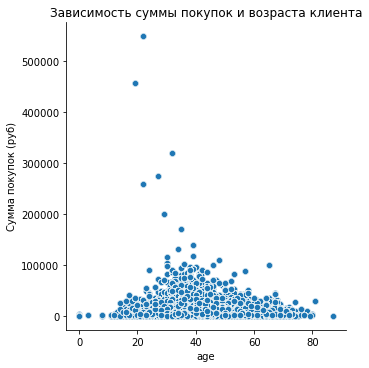

In [50]:
sb.relplot(x='age', y='Сумма покупок (руб)', data=df).set(
    title='Зависимость суммы покупок и возраста клиента')


**Прослеживается минимальная взаивосвязь возраста клиентов и суммы покупок**

In [51]:
#Проверка зависимости возраста и суммы покупки
df['age'].corr(df['Сумма покупки'])

-0.008101385768049536

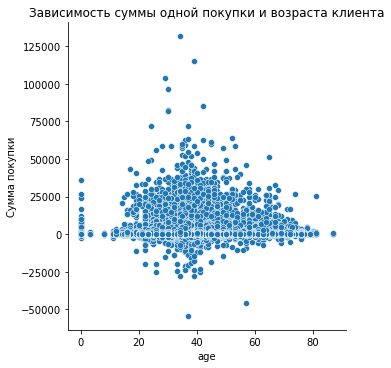

In [52]:
sb.relplot(x='age', y='Сумма покупки', data=df).set(
    title='Зависимость суммы одной покупки и возраста клиента')

**Взаимосвязь между возрастом клиента и суммой одной покупки не прослеживается**

In [53]:
#Проверка взаимосвязи возраста и среднего чека

df['age'].corr(df['Средний чек (руб)'])

0.02225770718780034

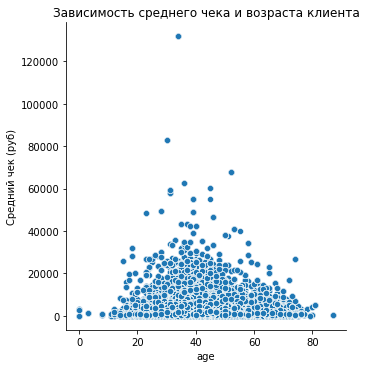

In [54]:
sb.relplot(x='age', y='Средний чек (руб)', data=df).set(
    title='Зависимость среднего чека и возраста клиента')

**Как и в случае с суммой покупок, возраст клиента отчасти взаимосвязан с размером среднего чека**

[Text(0.5, 1.0, 'Связь бонусов и покупок')]

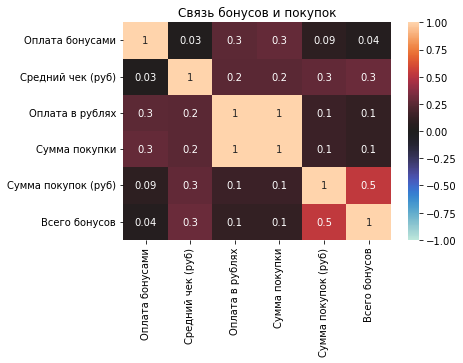

In [55]:
# Определение взаимосвязи между бонусами и покупками.
sb.heatmap(df[['Оплата бонусами','Средний чек (руб)','Оплата в рублях',
               'Сумма покупки', 'Сумма покупок (руб)', 'Всего бонусов']].corr(),
           annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0).set(
    title='Связь бонусов и покупок')

**Можно судить о том, что размер среднего чека, сумма покупок и факт наличия бонусов взаимосвязаны. Однако, оплата бонусами мало связана с суммой покупок и размером среднего чека**

In [56]:
phik_1 = df[['Согласие на СМС', 'Согласие на рекламу', 'Средний чек (руб)',
               'Сумма покупки', 'Сумма покупок (руб)']].phik_matrix()

interval columns not set, guessing: ['Средний чек (руб)', 'Сумма покупки', 'Сумма покупок (руб)']


In [57]:
phik_1['Средний чек (руб)'].sort_values(ascending=False).round(2)

Средний чек (руб)      1.00
Сумма покупки          0.38
Сумма покупок (руб)    0.29
Согласие на рекламу    0.04
Согласие на СМС        0.03
Name: Средний чек (руб), dtype: float64

In [58]:
phik_1['Сумма покупок (руб)'].sort_values(ascending=False).round(2)

Сумма покупок (руб)    1.00
Средний чек (руб)      0.29
Сумма покупки          0.16
Согласие на рекламу    0.02
Согласие на СМС        0.02
Name: Сумма покупок (руб), dtype: float64

**Средний чек и сумма покупок практически не взаимосвязаны с согласием на рассылку**

In [60]:
# Оценка взаимосвязи признаков независимо от типа данных
phik_2 =df[['Использовано бонусов', 'Средний чек (руб)', 'Сумма покупок (руб)',
       'Создан кассиром', 'Создан в магазине', 'Согласие на СМС', 'Согласие на рекламу', 'age',
       'Тип операции', 'Списано бонусов', 'Начислено бонусов',
       'Сумма покупки', 'Сумма скидки', 'Оплата в рублях',
       'Оплата бонусами', 'Количество','Категория товара']].phik_matrix()

interval columns not set, guessing: ['Использовано бонусов', 'Средний чек (руб)', 'Сумма покупок (руб)', 'age', 'Списано бонусов', 'Начислено бонусов', 'Сумма покупки', 'Сумма скидки', 'Оплата в рублях', 'Оплата бонусами', 'Количество']


In [61]:
phik_2['Средний чек (руб)'].sort_values(ascending=False).round(2)

Средний чек (руб)       1.00
Начислено бонусов       0.47
Оплата в рублях         0.43
Сумма покупки           0.38
Сумма покупок (руб)     0.29
Сумма скидки            0.11
Создан в магазине       0.04
Согласие на рекламу     0.04
Согласие на СМС         0.03
age                     0.03
Тип операции            0.02
Использовано бонусов    0.02
Категория товара        0.02
Количество              0.02
Оплата бонусами         0.02
Создан кассиром         0.02
Списано бонусов         0.01
Name: Средний чек (руб), dtype: float64

In [62]:
phik_2['Сумма покупок (руб)'].sort_values(ascending=False).round(2)

Сумма покупок (руб)     1.00
Использовано бонусов    0.89
Средний чек (руб)       0.29
age                     0.19
Начислено бонусов       0.17
Сумма покупки           0.16
Оплата в рублях         0.14
Количество              0.12
Тип операции            0.10
Списано бонусов         0.09
Оплата бонусами         0.09
Категория товара        0.08
Создан в магазине       0.07
Создан кассиром         0.05
Сумма скидки            0.05
Согласие на рекламу     0.02
Согласие на СМС         0.02
Name: Сумма покупок (руб), dtype: float64

**Исходя из анализа, учитывающего категориальные признаки, можно предположить, что объективных связей между признаками и размером среднего чека практически нет или же они несущественны. Выделить можно `Сумма скидки`. <br> Но что касается суммы покупок, то прослеживается зависимость c `Использовано бонусов`**